In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (16,8)
import pandas as pd
data = pd.read_csv("collegePhysics.csv")
data = data.drop(["Total Contact Hours of Students Who Met With SI Leader During Office Hours"], axis = 1)
data.head(30)

,Year,Semester,SI N,"SI Combined A, B, C",SI combined D&F,W/I,GPA SI,# of SI Session Offered,Total Contact Hrs of Participating SI Students,Mean # of Sessions Attended,Mean Size of SIS,Mean SI Participant Evaluation of Helpfulness of SI Sessions (1=low to 5=high),Non-SI N,"Non-SI Combined A,B, C",Non-SI Combined D&F,W/I.1,GPA Non SI
0,2000,Fall,0,0,0,0,0.00,0.0,0,0,0,0.00,0,0,0,0,0.00
1,2000,Spring,12,12,0,0,2.83,48.0,45,4,1,4.27,14,13,1,1,2.69
2,2003,Fall,14,14,0,0,3.07,41.0,152,11,4,4.14,27,14,13,7,2.40
3,2003,Spring,13,12,1,0,2.54,34.0,53,4,2,4.35,19,13,6,1,2.39
4,2004,Fall,0,0,0,0,0.00,0.0,0,0,0,0.00,0,0,0,0,0.00
5,2004,Spring,12,9,3,0,2.17,37.0,56,5,2,3.40,19,15,4,1,2.11
6,2005,Fall,17,10,7,1,1.88,39.0,57,3,1,3.41,25,16,9,3,1.91
7,2005,Spring,14,14,0,0,3.07,41.0,152,11,4,4.14,27,14,13,7,2.40
8,2006,Fall,4,0,4,1,0.00,14.0,26,7,2,3.80,30,15,15,0,1.70
9,2006,Spring,8,8,0,0,2.75,34.0,20,3,1,3.85,15,13,2,0,2.27


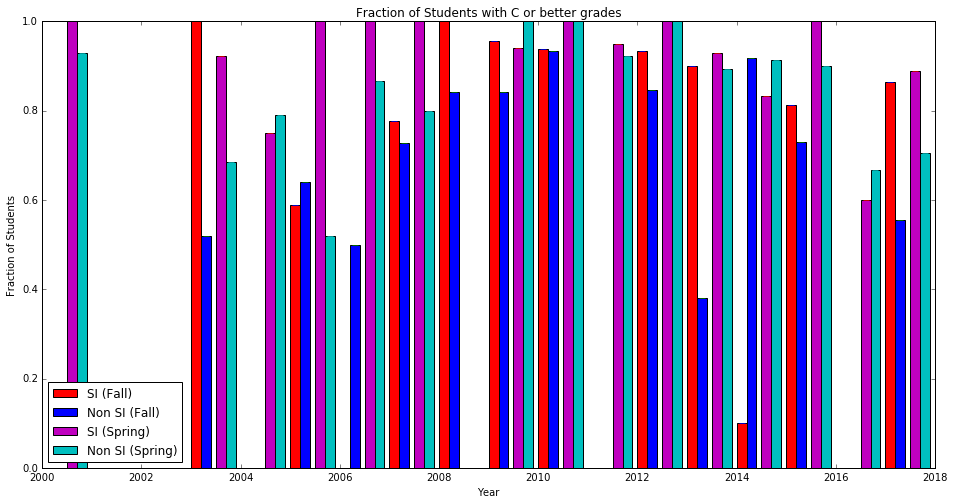

In [48]:
isFall = data['Semester'] == 'Fall'
isSpring = data['Semester'] == 'Spring'
width = 0.2 

data_fall = data[isFall]
data_spring = data[isSpring]

good_si_fall = data_fall.iloc[:,3]
n_si_fall = data_fall.iloc[:,2]
good_si_spring = data_spring.iloc[:,3]
n_si_spring = data_spring.iloc[:,2]

good_nosi_fall = data_fall.iloc[:,13]
n_nosi_fall = data_fall.iloc[:,12]
good_nosi_spring = data_spring.iloc[:,13]
n_nosi_spring = data_spring.iloc[:,12]

# 2014 Fall is wrong ? 
frac_good_si_fall = good_si_fall/n_si_fall
error_good_si_fall = frac_good_si_fall * np.sqrt( (1.0/good_si_fall) + (1.0/n_si_fall))
frac_good_si_spring = good_si_spring/n_si_spring
error_good_si_fall = frac_good_si_spring * np.sqrt( (1.0/good_si_spring) + (1.0/n_si_spring))
frac_good_nosi_fall = good_nosi_fall/n_nosi_fall
error_good_nosi_fall = frac_good_nosi_fall * np.sqrt( (1.0/good_nosi_fall) + (1.0/n_nosi_fall))
frac_good_nosi_spring = good_nosi_spring/n_nosi_spring
error_good_nosi_fall = frac_good_nosi_spring * np.sqrt( (1.0/good_nosi_spring) + (1.0/n_nosi_spring))

xsif = data_fall['Year']
xnonsif = xsif+0.2
xsis = data_spring['Year']+0.5
xnonsis= xsis+0.2

fig, ax = plt.subplots()

barsif = ax.bar(xsif, frac_good_si_fall, width, color='r', yerr=0.0, label= "SI (Fall)")
barnonsif = ax.bar(xnonsif, frac_good_nosi_fall, width, color='b', yerr=0.0 , label= "Non SI (Fall)")
barsis = ax.bar(xsis, frac_good_si_spring, width, color='m', yerr=0.0, label= "SI (Spring)")
barnonsis = ax.bar(xnonsis, frac_good_nosi_spring, width, color='c', yerr=0.0, label= "Non SI (Spring)")

ax.set_ylabel('Fraction of Students')
ax.set_xlabel('Year')
ax.set_title('Fraction of Students with C or better grades')
ax.legend(loc='best')
fig.show()
 

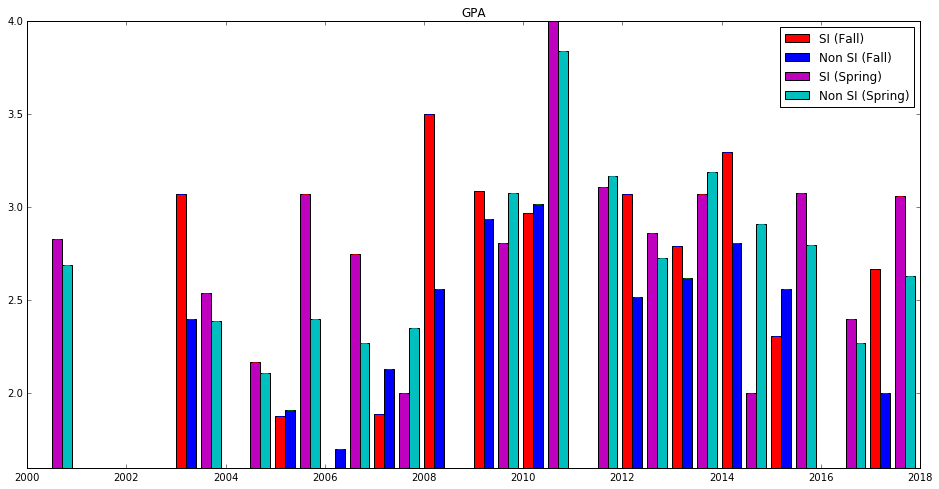

In [53]:
gpa_si_fall = data_fall["GPA SI"]
gpa_nosi_fall = data_fall["GPA Non SI"]
gpa_si_spring = data_spring["GPA SI"]
gpa_nosi_spring = data_spring["GPA Non SI"]

plt.bar(xsif, gpa_si_fall, width, color='r', yerr=0.0, label= "SI (Fall)")
plt.bar(xnonsif, gpa_nosi_fall, width, color='b', yerr=0.0, label= "Non SI (Fall)")
plt.bar(xsis, gpa_si_spring, width, color='m', yerr=0.0, label= "SI (Spring)")
plt.bar(xnonsis, gpa_nosi_spring, width, color='c', yerr=0.0, label= "Non SI (Spring)")


plt.legend(loc="best")
plt.title("GPA")
plt.ylim(1.6, 4.0)
plt.show()

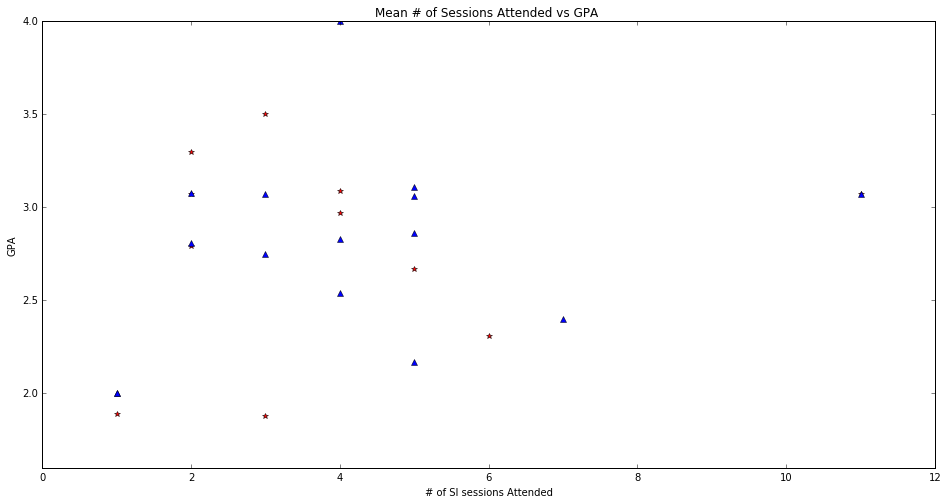

In [58]:
#Class size vs GPA SI vs Non SI
meanSS_si_fall = data_fall.iloc[:,9]
meanSS_si_spring = data_spring.iloc[:,9]

#gpa_si.hist()
plt.plot(meanSS_si_fall, gpa_si_fall, "*r", label="Fall")
plt.plot(meanSS_si_spring, gpa_si_spring, "^b", label="Spring")

plt.xlabel("# of SI sessions Attended")
plt.ylabel("GPA")
plt.title("Mean # of Sessions Attended vs GPA ")
#plt.legend('best')
plt.ylim(1.6, 4.0)
plt.show()


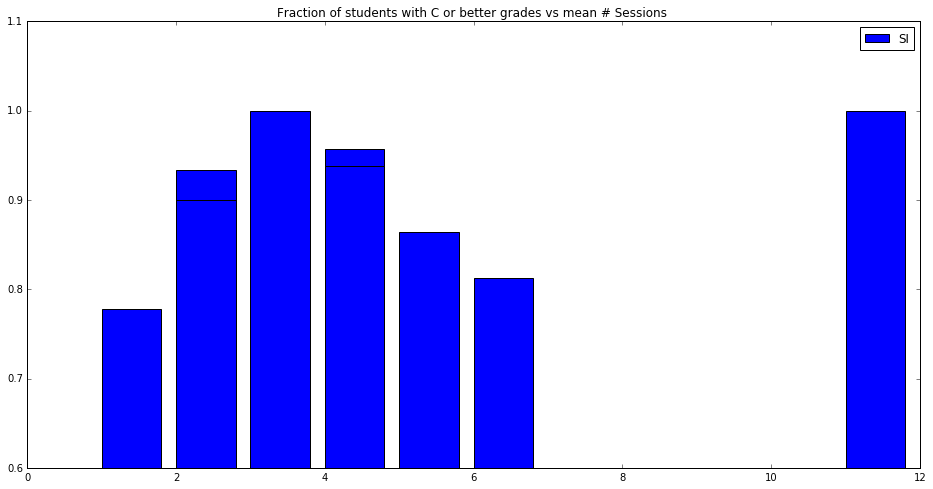

In [62]:
#Class size vs GPA SI vs Non SI

plt.bar(meanSS_si_fall, frac_good_si_fall, label="SI")

plt.legend(loc="best")
plt.title("Fraction of students with C or better grades vs mean # Sessions ")
plt.ylim(0.6, 1.1)
plt.show()



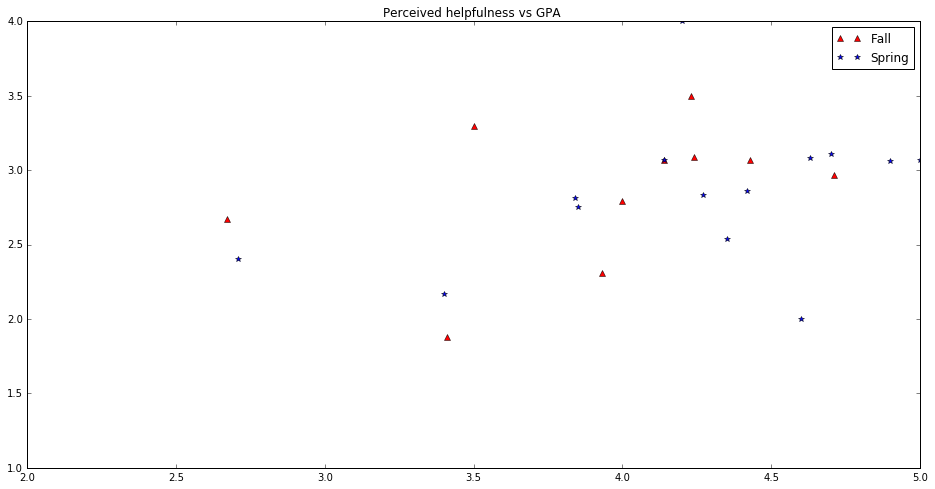

In [70]:
#Perceived helpfulness vs letter grade OR GPA
perceived_helpfulness = data_fall.iloc[:,11]
plt.plot(perceived_helpfulness, gpa_si_fall, "^r", label="Fall")
perceived_helpfulness_spring = data_spring.iloc[:,11]
plt.plot(perceived_helpfulness_spring, gpa_si_spring, "*b", label="Spring")



plt.legend(loc="best")
plt.title("Perceived helpfulness vs GPA ")
plt.ylim(1,4)
plt.xlim(2, 5)
plt.show()

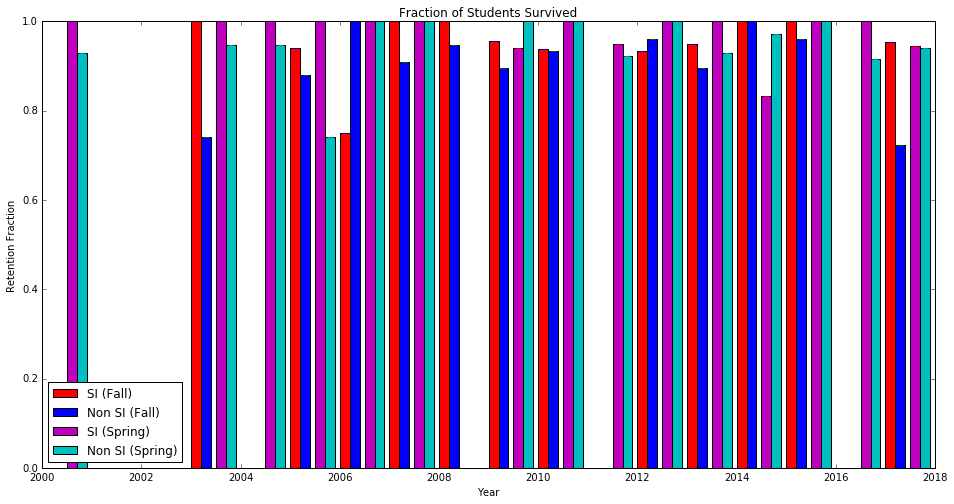

In [71]:
survival_frac_si_fall = (n_si_fall- data_fall.iloc[:,5])/n_si_fall
survival_frac_nosi_fall = (n_nosi_fall-data_fall.iloc[:,15])/n_nosi_fall
survival_frac_si_spring = (n_si_spring - data_spring.iloc[:,5])/n_si_spring
survival_frac_nosi_spring = (n_nosi_spring - data_spring.iloc[:,15])/n_nosi_spring

fig, ax = plt.subplots()

barsif = ax.bar(xsif, survival_frac_si_fall, width, color='r', yerr=0.0, label= "SI (Fall)")
barnonsif = ax.bar(xnonsif, survival_frac_nosi_fall, width, color='b', yerr=0.0 , label= "Non SI (Fall)")
barsis = ax.bar(xsis, survival_frac_si_spring, width, color='m', yerr=0.0, label= "SI (Spring)")
barnonsis = ax.bar(xnonsis, survival_frac_nosi_spring, width, color='c', yerr=0.0, label= "Non SI (Spring)")

ax.set_ylabel('Retention Fraction')
ax.set_xlabel('Year')
ax.set_title('Fraction of Students Survived')
ax.legend(loc='best')
fig.show()